# Study - E vs Delta-Z

In [6]:
import time
print("Last updated on ", time.asctime())

Last updated on  Thu Dec  6 13:11:11 2018


In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
import time
import datetime

import tables            as tb
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.dates  as md
import collections       as collections
import pandas            as pd

from   scipy import optimize
import invisible_cities.core.fit_functions as fitf
from  invisible_cities.core .core_functions import in_range

import krcal.utils.plt_functions          as krplot
import krcal.utils.hst_extend_functions   as hst

import csth.utils.cepeak_plot             as cpkplot

In [9]:
# Plotting style
default_cmap = "jet"
figure_size  = 14, 8
font_size    = 14

plt.rcParams["figure.figsize"] =   figure_size
plt.rcParams[  "font.size"   ] =   font_size

In [10]:
#run_numbers = [6482, 6483, 6484, 6485]
run_numbers = [6341, ]
#trigger    = 'trigger2'
#input_filename = f"$IC_DATA/{run_number}/pmaps/cepks_{run_number}_90_9188_{trigger}.h5"
tag = '6q0min_trigger1'
#tag = '6q0min_ebug'
input_filenames = [f"$IC_DATA/{run_number}/cepks/cepks_{run_number}_0000_9999_{tag}.h5" for run_number in run_numbers]
input_files     = [os.path.expandvars(ifile) for ifile in input_filenames]

In [11]:
def esum_from_hdf(filename, clear = True):
    print(filename)
    h = pd.HDFStore(filename)
    esum = h['esum']
    print('total events :', len(esum))
    esum.dropna()
    sel_base = (esum.nslices > 0) & (esum.nhits > 0) & (esum.zmax < 650.) & (esum.s1e >0)
    esum = esum[sel_base]
    print('clean events :', len(esum) )
    #esum0 = esum[sel_base]
    #h.close()
    return esum

In [12]:
esums = [esum_from_hdf(ifile) for ifile in input_files]

/Users/hernando/investigacion/NEXT/data/runIV//6341/cepks/cepks_6341_0000_9999_6q0min_trigger1.h5
total events : 919845
clean events : 899619


/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/hernando/miniconda/envs/IC-3.6-2018-08-29/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


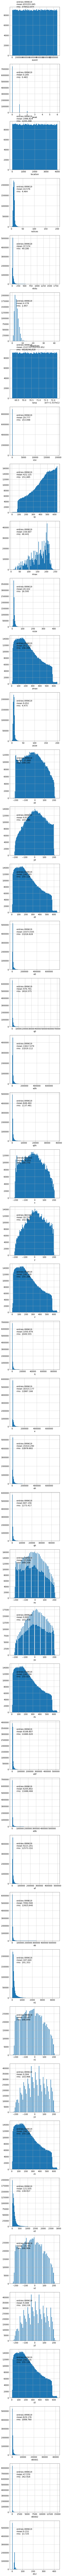

In [13]:
cpkplot.df(esums[0])

In [14]:
esum = esums[0]

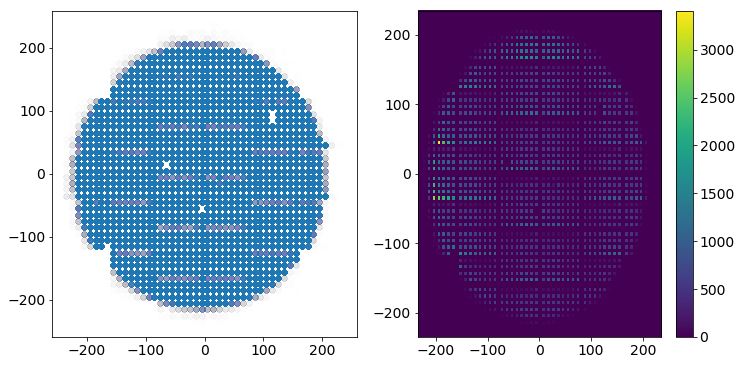

In [19]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(esum.x1, esum.y1, alpha = 0.005);
plt.subplot(1, 2, 2)
plt.hist2d(esum.x1, esum.y1, (100, 100));
plt.colorbar();

In [16]:
esum = esums[0]
#xsel = in_range(esum.e, 100e3, 800e3)

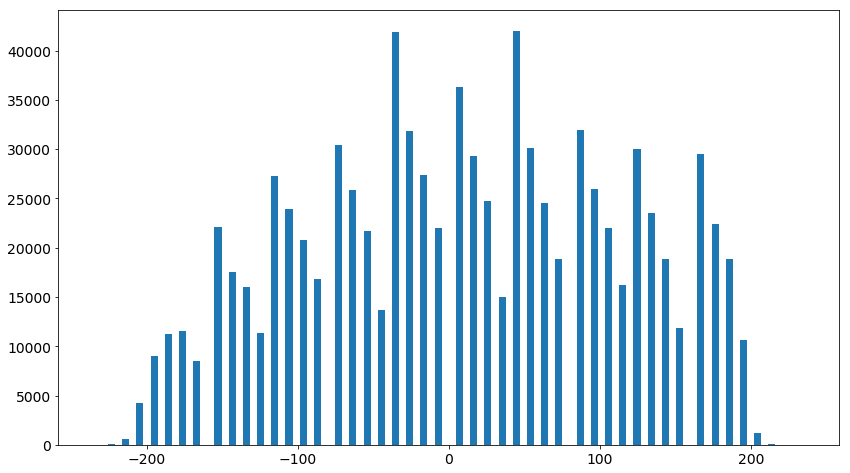

In [17]:
plt.hist(esum.y1, 100);